# **Hostel Electricity Usage Logger(ALOK ABHIJEET)**

In [1]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [3]:
# Step 2: Create a CSV file with headers
filename = "hostel_usage.csv"

# Create a new CSV with headers
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Room", "Units_Consumed"])

print("CSV file created successfully!")

CSV file created successfully!


In [4]:
# Step 3: Insert daily electricity usage into CSV
def log_usage(date, room, units):
    with open(filename, mode="a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([date, room, units])
    print(f"Data added -> Date:{date}, Room:{room}, Units:{units}")

# Example data entries
log_usage("2025-07-01", 101, 8)
log_usage("2025-07-01", 102, 5)
log_usage("2025-07-02", 101, 7)
log_usage("2025-07-02", 102, 6)


Data added -> Date:2025-07-01, Room:101, Units:8
Data added -> Date:2025-07-01, Room:102, Units:5
Data added -> Date:2025-07-02, Room:101, Units:7
Data added -> Date:2025-07-02, Room:102, Units:6


In [5]:
# Step 4: Read data from CSV
df = pd.read_csv(filename)
print(df)


         Date  Room  Units_Consumed
0  2025-07-01   101               8
1  2025-07-01   102               5
2  2025-07-02   101               7
3  2025-07-02   102               6


In [6]:
# Step 5: Group by room and calculate monthly total usage
monthly_summary = df.groupby("Room")["Units_Consumed"].sum().reset_index()
print(monthly_summary)


   Room  Units_Consumed
0   101              15
1   102              11


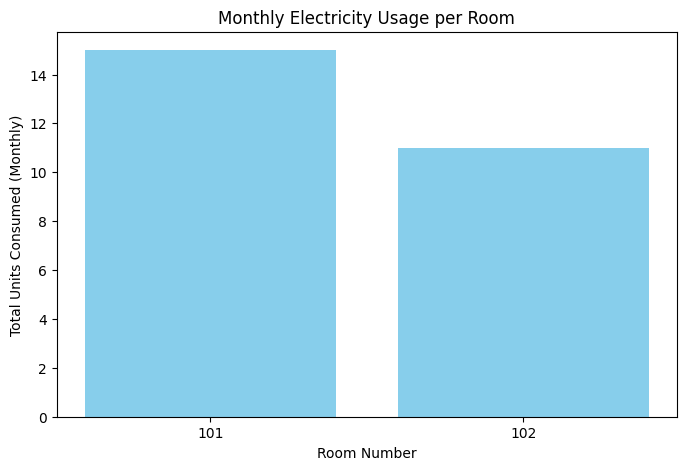

In [7]:
# Step 6: Plot bar graph of room-wise usage
plt.figure(figsize=(8,5))
plt.bar(monthly_summary["Room"].astype(str), monthly_summary["Units_Consumed"], color="skyblue")
plt.xlabel("Room Number")
plt.ylabel("Total Units Consumed (Monthly)")
plt.title("Monthly Electricity Usage per Room")
plt.show()


Rooms exceeding threshold:
   Room  Units_Consumed
0   101              15


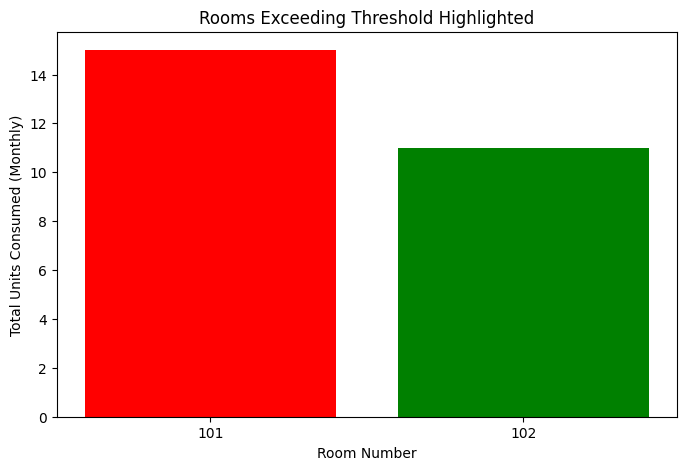

In [8]:
# Step 7: Highlight rooms exceeding threshold
threshold = 12  # set threshold
high_usage = monthly_summary[monthly_summary["Units_Consumed"] > threshold]

print("Rooms exceeding threshold:")
print(high_usage)

# Plot with highlight
plt.figure(figsize=(8,5))
colors = ["red" if units > threshold else "green" for units in monthly_summary["Units_Consumed"]]
plt.bar(monthly_summary["Room"].astype(str), monthly_summary["Units_Consumed"], color=colors)
plt.xlabel("Room Number")
plt.ylabel("Total Units Consumed (Monthly)")
plt.title("Rooms Exceeding Threshold Highlighted")
plt.show()
